# <font style="color:rgb(50,120,229)">Python, OpenCV 설치 </font>

### <font style="color:rgb(50,120,229)">Installing OpenCV from prebuilt binaries</font>

https://docs.opencv.org/master/d5/de5/tutorial_py_setup_in_windows.html

Below Python packages are to be downloaded and installed to their default locations.
1. download and install Python 3.x : https://www.python.org/downloads/
2. Numpy package (for example, using pip install numpy command).
3. Matplotlib (pip install matplotlib) (Matplotlib is optional, but recommended since we use it a lot in our tutorials).
4. opencv (for example, pip install opencv-python)


Open Python IDLE and type following codes in Python terminal.
``` python
>>> import cv2 as cv
>>> print( cv.__version__ )
```
If the results are printed out without any errors, congratulations !!! You have installed OpenCV-Python successfully.We have already discussed about how an image is formed and how it is stored. In this module, we will dive into the code and check out what are the functions available in OpenCV for manipulating images.

# <font style="color:rgb(50,120,229)">Overview </font>

We have already discussed about how an image is formed and how it is stored. In this module, we will dive into the code and check out what are the functions available in OpenCV for manipulating images.

We will cover the following:
1. Image I/O - Read, Write & Display an image
2. Image Properties - color, channels, shape, image structure
3. Creating new images, accessing pixels and region of interest (ROI)

# <font style="color:rgb(50,120,229)">Import Libraries</font>

In [0]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

# <font style="color:rgb(50,120,229)">Reading an Image</font>
OpenCV allows reading different types of images (JPG, PNG, etc). You can load grayscale images colour images or you can also load images with Alpha channel (Alpha channel will be discussed in a later section). It uses the [**`imread`**](https://docs.opencv.org/4.1.0/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56) function which has the following syntax:

### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
retval	=	cv2.imread(	filename[, flags]	)
```

It has **2 arguments**:

1. `retval` is the image if it is successfully loaded. Otherwise it is `None`. This may happen if the filename is wrong or the file is corrupt.
2. `Path of the image file`: This can be an **absolute** or **relative** path. This is a **mandatory argument**.
3. `Flags`: These flags are used to read an image in a particular format (for example, grayscale/color/with alpha channel). This is an **optional argument** with a default value of `cv2.IMREAD_COLOR` or `1` which loads the image as a color image.

Before we proceed with some examples, let's also have a look at the `flags` available.

**Flags**
1. **`cv2.IMREAD_GRAYSCALE`** or **`0`**: Loads image in grayscale mode
2. **`cv2.IMREAD_COLOR`** or **`1`**: Loads a color image. Any transparency of image will be neglected. It is the default flag.
3. **`cv2.IMREAD_UNCHANGED`** or **`-1`**: Loads image as such including alpha channel.


Let us load this image and discuss further
<img src="https://www.dropbox.com/s/ed0r779b052o0s2/number_zero.jpg?dl=1" width=100>

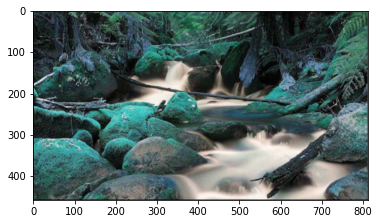

In [35]:
img = cv2.imread('./input.jpg')  # PC에서 작업할 때

# Google Drive에서 작업할 때
# from google.colab import drive
# drive.mount('/gdrive', force_remount=True)  # 마운트 필요.
# DATA_PATH = '/gdrive/My Drive/Lecture_2020/Improc/Lecture_JupyterNotebook/1_Basics+GeometricTransform/images/'
# img = cv2.imread(DATA_PATH + 'input.jpg')

plt.imshow(img)  # matplotlib으로 show
#plt.title('input image')  # matplotlib으로 show할 때 title찍으려면

# cv2.imshow('Input image', img)  # opencv로 show
# cv2.waitKey()

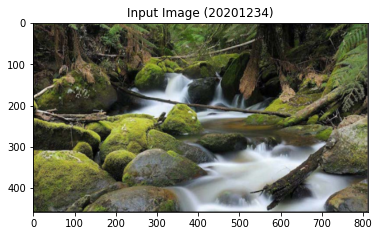

In [43]:
b,g,r=cv2.split(img)  # openCV는 기본이 b,g,r순서
img_rgb = cv2.merge([r, g, b])
plt.title('Input Image (20201234)')
plt.imshow(img_rgb)   # matplotlib는 기본이 r,g,b순서
plt.show()

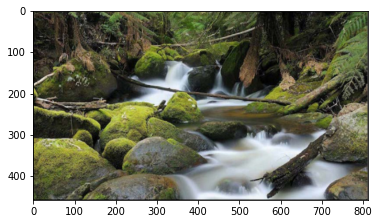

In [0]:
plt.imshow(img[:,:,::-1])  # 이렇게 해도 됨..... 간단하지요

[[  1   0   3   0   3   0   3   2   4   2   0]
 [  0   1   0   3   3 253 253   0   0   2   1]
 [  0   0   8   0 249 255 255 253  71   1   5]
 [  3   0   2 251 255   2   0 253 254   0   2]
 [  1   5   0 252   4   0   3   0 255   4   0]
 [  0   0   2 255   0   0   0   3 253   0   4]
 [  0   5   4 249   4   2   0   0 255   1   0]
 [  2   0   0 255   3   0   5   0 254   0   4]
 [  0   0   0 255   1   0   0   3 255   0   0]
 [  1   5   0 252   2   2   2  76 250   7   0]
 [  0   0   5   0 254   0   0 255 254   0   1]
 [  0   8   0   3 253 253 255 250   1   2   1]
 [  2   0   0   0   5   0   4   1   3   0   0]]


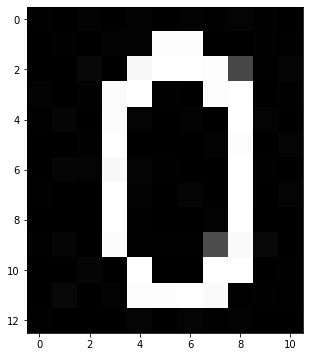

In [0]:
# Read image in Grayscale format
testImage = cv2.imread('./number_zero.jpg', cv2.IMREAD_GRAYSCALE) # PC에서 읽을 때
# 구글 드라이브에서 읽을 때
# testImage = cv2.imread(DATA_PATH + 'number_zero.jpg', cv2.IMREAD_GRAYSCALE)

print(testImage)
plt.imshow(testImage)

We print the 2-dimensional array to see what the image is. You can make out that the image signifies a `0`. 

## <font style="color:rgb(50,120,229)">Intensity </font>
The values printed above are the intensity values of each pixel. 

**0 means black pixel and as the value increases, it moves towards white. A value of 255 is a white pixel.**

## <font style="color:rgb(50,120,229)">Image Properties</font>

In [0]:
print("Data type = {}".format(testImage.dtype))
print("Object type = {}".format(type(testImage)))
print("Image Dimensions = {}".format(testImage.shape))

Data type = uint8
Object type = <class 'numpy.ndarray'>
Image Dimensions = (13, 11)


The following observations can be made:
1. The datatype of the loaded image is **unsigned int and the depth is 8 bit**
1. The image is just a 2-dimesional numpy array with values ranging from **0 to 255**.
1. The size or resolution is **13x11** which means **height=13 and witdh=11**. In other words, it has **13 rows and 11 columns**.


#### <font style = "color:rgb(200,0,0)">NOTE</font>
It should be kept in mind that in OpenCV, size is represented as a tuple of `widthxheight` or `#columnsX#rows`. But in numpy, the shape method returns size as a tuple of `heightxwidth`.

# <font style="color:rgb(50,120,229)">Manipulating Pixels</font>
So, we know that the grayscale image is simply a 2-D array. So, all operations supported on arrays should be available for working with images. Let us start by doing some pixel level manipulations. We will see how to access a particular pixel and modify it.

## <font style="color:rgb(50,120,229)">Accessing Pixels</font>
In the above testImage, we saw that the first pixel has a value of 1. Let us check it.

Since this is a numpy array, we have zero-based indexing and we can access the first element using the index (0,0).

In [0]:
print(testImage[0,0])

1


#### <font style = "color:rgb(200,0,0)">NOTE on indexing</font>

As mentioned earlier, since matrices are numpy arrays, the first index will be the `row number` and second index is `column number`. This leads to a lot of confusion since we think of pixels in terms of `(x,y)` or `(column,row)` coordinates and not `(row,column)`

For example, to access the element at `4th row` and `5th column`, we should use `img[3,4]`. But as we will see in Image annotation section, we will deal with points which are represented as `(x,y)` and thus, the coordinates will be `(4,3)`.

## <font style="color:rgb(50,120,229)">Modifying pixel values</font>
Similarly for modifying the value of a pixel, we can simply assign the value to the pixel. 

Let's change the value of the first element and check if the image is updated.

In [0]:
testImage[0,0]=200
print(testImage)

[[200   0   3   0   3   0   3   2   4   2   0]
 [  0   1   0   3   3 253 253   0   0   2   1]
 [  0   0   8   0 249 255 255 253  71   1   5]
 [  3   0   2 251 255   2   0 253 254   0   2]
 [  1   5   0 252   4   0   3   0 255   4   0]
 [  0   0   2 255   0   0   0   3 253   0   4]
 [  0   5   4 249   4   2   0   0 255   1   0]
 [  2   0   0 255   3   0   5   0 254   0   4]
 [  0   0   0 255   1   0   0   3 255   0   0]
 [  1   5   0 252   2   2   2  76 250   7   0]
 [  0   0   5   0 254   0   0 255 254   0   1]
 [  0   8   0   3 253 253 255 250   1   2   1]
 [  2   0   0   0   5   0   4   1   3   0   0]]


# <font style="color:rgb(50,120,229)">Manipulating Group of Pixels</font>
So, now we know how to manipulate individual pixels. But what about a region or group of pixels? It can be done using range based indexing available in python. 

Let is try to access the values of a region and name it `test_roi`. ( *ROI is an abbreviation for Region of Interest* )

## <font style="color:rgb(50,120,229)">Access a region</font>

In [0]:
test_roi = testImage[0:2,0:4]
print("Original Matrix\n{}\n".format(testImage))
print("Selected Region\n{}\n".format(test_roi))

Original Matrix
[[200   0   3   0   3   0   3   2   4   2   0]
 [  0   1   0   3   3 253 253   0   0   2   1]
 [  0   0   8   0 249 255 255 253  71   1   5]
 [  3   0   2 251 255   2   0 253 254   0   2]
 [  1   5   0 252   4   0   3   0 255   4   0]
 [  0   0   2 255   0   0   0   3 253   0   4]
 [  0   5   4 249   4   2   0   0 255   1   0]
 [  2   0   0 255   3   0   5   0 254   0   4]
 [  0   0   0 255   1   0   0   3 255   0   0]
 [  1   5   0 252   2   2   2  76 250   7   0]
 [  0   0   5   0 254   0   0 255 254   0   1]
 [  0   8   0   3 253 253 255 250   1   2   1]
 [  2   0   0   0   5   0   4   1   3   0   0]]

Selected Region
[[200   0   3   0]
 [  0   1   0   3]]



## <font style="color:rgb(50,120,229)">Modifying a region</font>
Modifying a region is also straightforward. 

In [0]:
testImage[0:2,0:4] = 111
print("Modified Matrix\n{}\n".format(testImage))

Modified Matrix
[[111 111 111 111   3   0   3   2   4   2   0]
 [111 111 111 111   3 253 253   0   0   2   1]
 [  0   0   8   0 249 255 255 253  71   1   5]
 [  3   0   2 251 255   2   0 253 254   0   2]
 [  1   5   0 252   4   0   3   0 255   4   0]
 [  0   0   2 255   0   0   0   3 253   0   4]
 [  0   5   4 249   4   2   0   0 255   1   0]
 [  2   0   0 255   3   0   5   0 254   0   4]
 [  0   0   0 255   1   0   0   3 255   0   0]
 [  1   5   0 252   2   2   2  76 250   7   0]
 [  0   0   5   0 254   0   0 255 254   0   1]
 [  0   8   0   3 253 253 255 250   1   2   1]
 [  2   0   0   0   5   0   4   1   3   0   0]]



# <font style="color:rgb(50,120,229)">Displaying an Image</font>
In the previous section, we printed out the Image matrix and were able to make out what the image was. However, this is not the correct way to visualize images as it wont be possible to print large arrays and make out anything.

Let's see how we should display the images so that it looks more familiar!

We can use two functions for displaying an image.

### <font style = "color:rgb(200,0,0)">NOTE </font>

One important thing to note while displaying images is the datatype of the image. The display functions expect the images to be in the following format.
1. If the image is in float data type, then the range of values should be between 0 and 1.
1. If the image is in int data type, then the range of values should be between 0 and 255.

Keep this in mind to avoid undesirable outputs while displaying the images.


## <font style="color:rgb(50,120,229)">1. Matplotlib's imshow</font>
This function will be used when we want to display the image in Jupyter Notebook.

### <font style = "color:rgb(8,133,37)">Function Syntax</font>

```Python:
None	=	plt.imshow( mat )
```
**Parameters**
- **`mat`** - Image to be displayed.


This function takes a many arguments but has only 1 mandatory argument. You can have a look at the [documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html) to see what are the other arguments available.

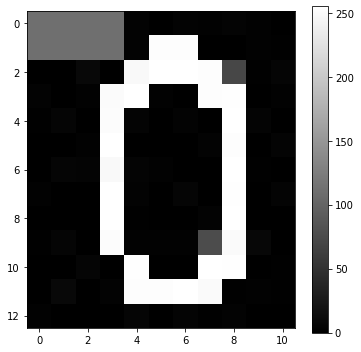

In [0]:
plt.imshow(testImage)
plt.colorbar()

# <font style="color:rgb(50,120,229)">Write the Image to Disk</font>
In most cases, you would want to save the output of your application. We do this using the [**`imwrite`**](https://docs.opencv.org/4.1.0/d4/da8/group__imgcodecs.html#gabbc7ef1aa2edfaa87772f1202d67e0ce) function.


### <font style = "color:rgb(8,133,37)">Function Syntax</font>
```Python:
retval	=	cv2.imwrite(	filename, img [, params]	)
```
**Parameters**
- **filename** - String providing the relative or absolute path where the image should be saved.
- **img** - Image matrix to be saved.
- **params** - Additional information, like specifying the JPEG compression quality etc. Check the full list [**here**](https://docs.opencv.org/4.1.0/d4/da8/group__imgcodecs.html#ga292d81be8d76901bff7988d18d2b42ac)

In [0]:
cv2.imwrite("test.jpg",testImage)  # PC에서 저장

# 구글 드라이브에 저장
# cv2.imwrite(DATA_PATH + 'test.jpg', testImage)

True

We can see that the above function call returned True which indicates that the file was successfuly saved. Let's check it using the `ls` magic command available in Jupyter Notebook.

In [0]:
%pwd
%ls



input.jpg  musk.jpg  number_zero.jpg  sample_data/  test.jpg


# <font style="color:rgb(50,120,229)">Color Images</font>
In the previous section, we saw how an image is represented as a 2D Matrix. In this section, we will see how to load color images and discuss a few important points related to color images. 

Let us load a different image this time.
<img src="https://www.dropbox.com/s/odrry84c0w6p6rv/musk.jpg?dl=1" width=400>

In [0]:
# Path of the image to be loaded
# Here we are supplying a relative path
imagePath = "./musk.jpg"  # PC
# imagePath = DATA_PATH + 'musk.jpg'  # Google Drive

# Read the image
img = cv2.imread(imagePath)
print("image Dimension ={}".format(img.shape))

image Dimension =(500, 600, 3)


There are a a few things to note here : 

1. The image in this case has 3 dimensions. 
1. The third dimension indicates the number of channels in an image. For most images, this number is 3 ( namely R,G,B ). In some cases, there may be an additional channel (called alpha channel) which contains transparency information of the pixels - More on this later!

# <font style="color:rgb(50,120,229)">Image Channels</font>
As mentioned above, the color image consists of multiple channels. Each channel itself is a grayscale image. **`The combination of intensity values of the three channels gives the color that is displayed on the screen`**. There are many color spaces used in practice and we will discuss some of them in the later sections. Let us have a brief look at the most popular color space - the RGB color space.

In OpenCV, the order of channels R, G and B is reverse. i.e. In the image matrix, the Blue channel is indexed first, followed by the Green Channel and finally the Red Channel. 

### <font style = "color:rgb(8,133,37)">Display the image</font>

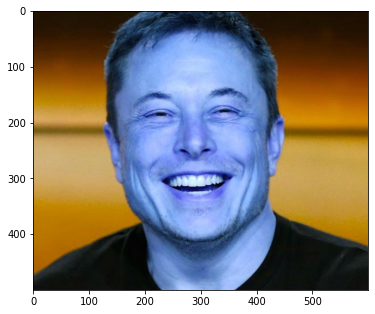

In [0]:
# 이상하게 보임.   OpenCV는 BGR로 읽고 matplotlib는 RGB로 show
plt.imshow(img)   

#### <font style = "color:rgb(200,0,0)">Important!</font>

Did you notice anything weird about the color here? This is because OpenCV uses **BGR** format by default whereas Matplotlib assumes the image to be in **RGB** format. This can be fixed by either 

* converting the image to RGB colorspace using **`cv2.cvtColor(img, cv2.COLOR_BGR2RGB)`** or 
* reverse the order of channels - **`plt.imshow(img[:,:,::-1])`** swaps the 1st and 3rd channel.

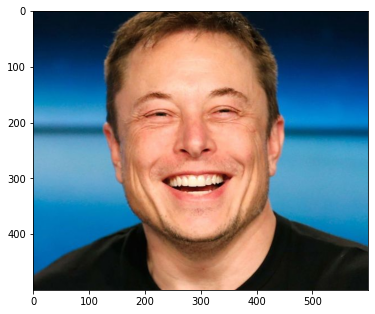

In [0]:
# Convert BGR to RGB colorspace
imgRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB)

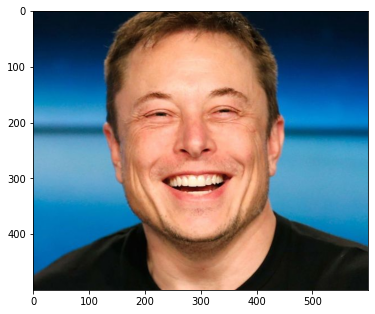

In [0]:
# We can also use the following - It will reverse the order of the 3rd dimension i.e. channels
plt.imshow(img[:,:,::-1])  # BGR을 RGB로 바꾼 후 show

Let us access the 3 channels and display the gray scale images in each channel

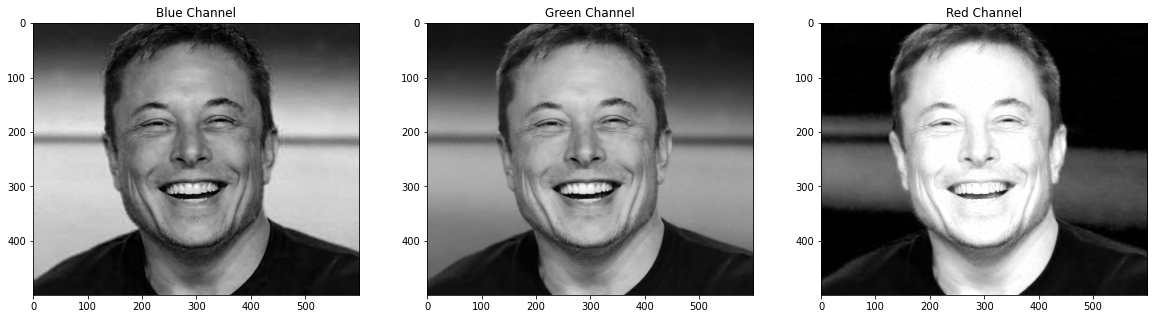

In [0]:
# Show the channels
plt.figure(figsize=[20,5])

plt.subplot(131);plt.imshow(img[:,:,0]);plt.title("Blue Channel");
plt.subplot(132);plt.imshow(img[:,:,1]);plt.title("Green Channel");
plt.subplot(133);plt.imshow(img[:,:,2]);plt.title("Red Channel");

#### <font style = "color:rgb(8,133,37)">Observation </font>
We had already mentioned that a white pixel means a high intensity value. If you look at the channels closely and compare them with the original image, you should be able to make out the following observations:
1. We can see in the original image that the background is blue in color. Thus, the blue channel is also having higher intensity values for the bakground, whereas the red channel is almost black for the background.
1. The face is reddish in color and thus, the red channel has very high values in the face region, while the other channels are a bit lower.
1. There is a greenish tint in the original image which is also reflected in the Green channel

This kind of information extraction can be very useful if you want to build basic applications which take decisions based on color ( more so, using specific color channel )

# <font style="color:rgb(50,120,229)">Splitting and Merging channels </font>
An alternate way of working with the individual channels is using split and merge. We can access the channels using an opencv function `cv2.split()` and merge them into a color image using `cv2.merge()`. Let us have a look at how it is done.

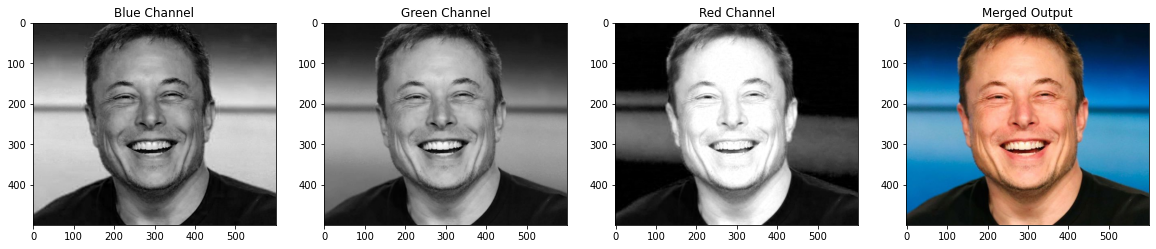

In [0]:
# Split the image into the B,G,R components
b,g,r = cv2.split(img)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(b);plt.title("Blue Channel");
plt.subplot(142);plt.imshow(g);plt.title("Green Channel");
plt.subplot(143);plt.imshow(r);plt.title("Red Channel");

# Merge the individual channels into a BGR image
imgMerged = cv2.merge((b,g,r))
# Show the merged output
plt.subplot(144);plt.imshow(imgMerged[:,:,::-1]);plt.title("Merged Output");

# <font style="color:rgb(50,120,229)">Manipulating Color Pixels</font>

We saw how to access and modify individual pixels for a grayscale image. The same does not hold for color images. As we discussed, the color image has 3 channels, when we access a pixel, we get a tuple/array of values from the 3 channels. Similarly, we need to specify a tuple for changing the values in the color image.

Let us load the grayscale image in color. Note that it still looks the same( black and white ) since all the channels contain the same values.

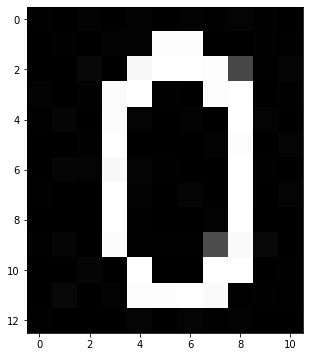

In [0]:
imagePath = "./number_zero.jpg"  # PC
# imagePath = DATA_PATH + 'number_zero.jpg'  # Google Drive
testImage = cv2.imread(imagePath,1)
plt.imshow(testImage)

## <font style="color:rgb(50,120,229)">Access Color pixel</font>

In [0]:
print(testImage[0,0])

[1 1 1]


You can see that the intensity value now has 3 elements - one for each channel

## <font style="color:rgb(50,120,229)">Modify Pixels</font>

Let us change the pixel at 
- location [0,0] to Yellow ( It is a mixture of Red and Green )
- location [1,1] to Cyan ( It is a mixture of Blue and Green )
- location [2,2] to Magenta ( It is a mixture of Blue and Red )

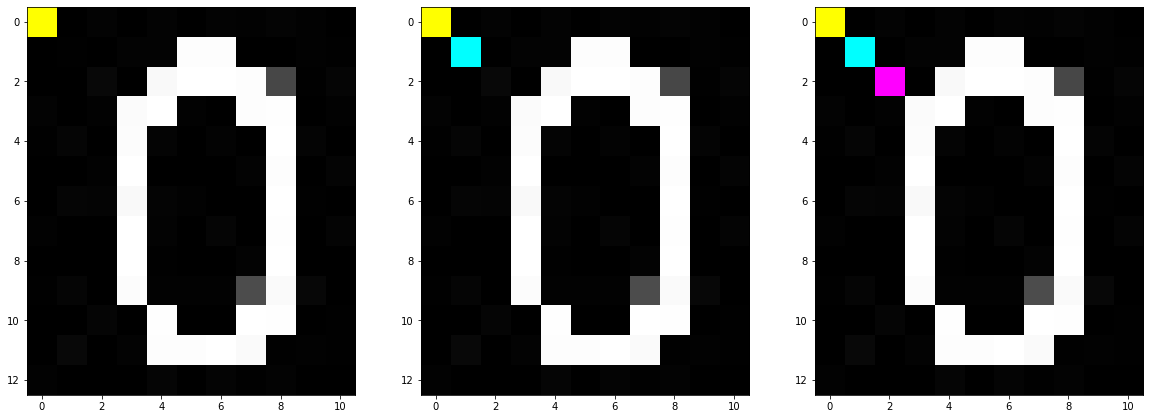

In [0]:
plt.figure(figsize=[20,20])

testImage[0,0] = (0,255,255)
plt.subplot(131);plt.imshow(testImage[:,:,::-1])

testImage[1,1] = (255,255,0)
plt.subplot(132);plt.imshow(testImage[:,:,::-1])

testImage[2,2] = (255,0,255)
plt.subplot(133);plt.imshow(testImage[:,:,::-1])

## <font style="color:rgb(50,120,229)">Modify Region of Interest</font>
Similar to above, we will change the pixels at specific regions as given below. The code is self-explanatory.

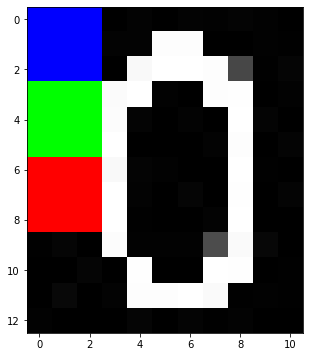

In [0]:
testImage[0:3,0:3] = (255,0,0)
testImage[3:6,0:3] = (0,255,0)
testImage[6:9,0:3] = (0,0,255)

plt.imshow(testImage[:,:,::-1])

# <font style="color:rgb(50,120,229)">Images with Alpha Channel</font>

In images with an alpha channel, each pixel not only has a color value, but also has a numerical transparency value ( between 0 to 255) that defines what will happen when the pixel is placed over another pixel.

There are 4 channels, i.e. 3 color channels and 1 alpha channel which indicates the transparency.

image Dimension =(608, 640, 4)


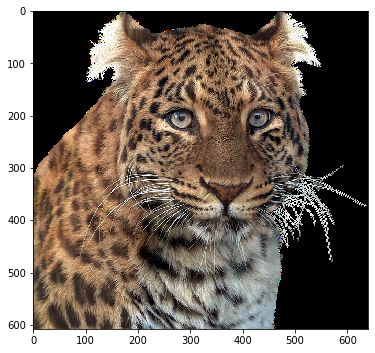

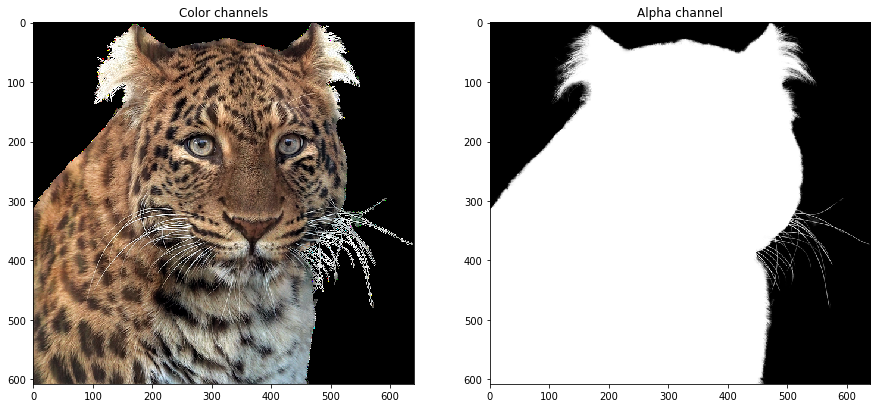

In [0]:
# Path of the PNG image to be loaded
imagePath = "./images/panther.png"  # PC
imagePath = DATA_PATH + 'panther.png'  # Google Drive

# Read the image
# Note that we are passing flag = -1 while reading the image ( it will read the image as is)
imgPNG = cv2.imread(imagePath,-1)  # -1 대신 cv2.IMREAD_UNCHANGED 해도 됨.  default : _COLOR
imgRGB = cv2.cvtColor(imgPNG,cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB)
print("image Dimension ={}".format(imgPNG.shape))
#First 3 channels will be combined to form BGR image
#Mask is the alpha channel of the original image
imgBGR = imgPNG[:,:,0:3]
imgMask = imgPNG[:,:,3]
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(imgBGR[:,:,::-1]);plt.title('Color channels');
plt.subplot(122);plt.imshow(imgMask,cmap='gray');plt.title('Alpha channel');

You can see the whiskers very clearly in the mask image. The alpha mask is basically a very accurate segmentation of the image. It is useful for creating overlays ( Augmented Reality type of applications ). If you don't have tha alpha mask, then you have to separate out the whiskers from the white background ( see original image above ) which can be very difficult.


# <font style="color:rgb(50,120,229)">Resizing an Image (Scaling) </font>

We will use [**`cv2.resize`**](https://docs.opencv.org/4.1.0/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d) function for resizing an image.

### <font style = "color:rgb(8,133,37)"> Function Syntax </font>

```python
dst	=	cv2.resize(	src, dsize[, dst[, fx[, fy[, interpolation]]]]	)
```
**Parameters**
- **`src`** - input image
- **`dst`** - output resized image
- **`dsize`** - output image size
- **`fx`** - scale factor along the horizontal axis; 
- **`fy`** - scale factor along the vertical axis; 
Either dsize or both fx and fy must be non-zero.
- **`interpolation`** - interpolation method ( Bilinear / Bicubic etc ). 

Check interpolation flags [here](https://docs.opencv.org/4.1.0/da/d54/group__imgproc__transform.html#ga5bb5a1fea74ea38e1a5445ca803ff121) 


There are two ways of using the resize function.
1. Specify width and height of output image explicitly
    > Use the dsize argument to specify the output size in the form (width,height).
2. Specify the scaling factors for resizing ( for both width and height )
    > Use fx and fy arguments to specify the scaling factor for horizontal and vertical axis respectively. It should be a float. The output size is calculated as `𝚂𝚒𝚣𝚎(𝚛𝚘𝚞𝚗𝚍(𝚏𝚡*𝚜𝚛𝚌.𝚌𝚘𝚕𝚜), 𝚛𝚘𝚞𝚗𝚍(𝚏𝚢*𝚜𝚛𝚌.𝚛𝚘𝚠𝚜))`

## <font style="color:rgb(50,120,229)">Method1 - Specify width and height</font>
You have to manually keep track of the aspect ratio of the output image as this method will not preserve the aspect ratio between input and output image.

Let us take an example to see how to use the functions in OpenCV for resizing.

Text(0.5, 1.0, 'Scaled Down Image')

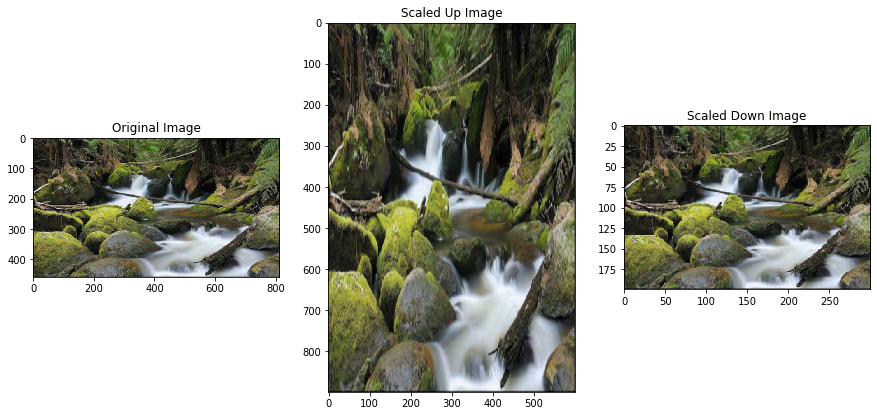

In [0]:
image = cv2.imread('./input.jpg')  # PC
# image = cv2.imread(DATA_PATH + 'input.jpg')  # Google Drive

# Set rows and columns
resizeDownWidth = 300
resizeDownHeight = 200
resizedDown = cv2.resize(image, (resizeDownWidth, resizeDownHeight), interpolation= cv2.INTER_LINEAR)

# Mess up with the aspect ratio
resizeUpWidth = 600
resizeUpHeight = 900
resizedUp = cv2.resize(image, (resizeUpWidth, resizeUpHeight), interpolation= cv2.INTER_LINEAR)

plt.figure(figsize=[15,15])
plt.subplot(131);plt.imshow(image[:,:,::-1]);plt.title("Original Image")
plt.subplot(132);plt.imshow(resizedUp[:,:,::-1]);plt.title("Scaled Up Image")
plt.subplot(133);plt.imshow(resizedDown[:,:,::-1]);plt.title("Scaled Down Image")

## <font style="color:rgb(50,120,229)">Method2 - Specify scaling factor</font>
This method is useful when you want to preserve the aspect ratio of the image. For example, say you have an image of size 400x600 and you want the width to be 360. Then, instead of specifying the height, you can find the scaling factor (i.e 360/600 = 0.6) and use it to resize the image.

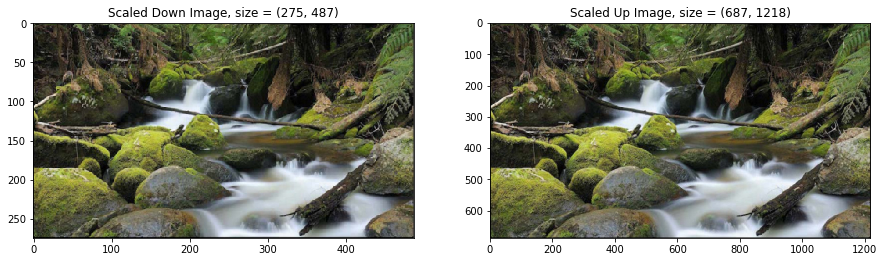

In [0]:
# Scaling Down the image 1.5 times by specifying both scaling factors
scaleUpX = 1.5
scaleUpY = 1.5

# Scaling Down the image 0.6 times specifying a single scale factor.
scaleDown = 0.6

scaledDown = cv2.resize(image, None, fx= scaleDown, fy= scaleDown, interpolation= cv2.INTER_LINEAR)

scaledUp = cv2.resize(image, None, fx= scaleUpX, fy= scaleUpY, interpolation= cv2.INTER_LINEAR)

# We can also use the following syntax for displaying image
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(scaledDown[...,::-1]);plt.title("Scaled Down Image, size = {}".format(scaledDown.shape[:2]));
plt.subplot(122);plt.imshow(scaledUp[...,::-1]);plt.title("Scaled Up Image, size = {}".format(scaledUp.shape[:2]));